## Machine learning should help us understand a dataset, not just make predictions about it. So by picking an area which we are not familiar with, it is a good test of whether we can build an understanding.

In [1]:
import math
import os

import mll
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from IPython.display import display

In [2]:
DATA_DIR = '/home/liangr/git/ml/bulldozers/data'
TRAIN_CSV = os.path.join(DATA_DIR, 'Train.csv')
os.makedirs(os.path.join(DATA_DIR, 'tmp'), exist_ok=True)
TRAIN_FEATHER = os.path.join(DATA_DIR, 'tmp', 'bulldozers.train.tmp')

In [5]:
df_raw = pd.read_csv(TRAIN_CSV, low_memory=False, parse_dates=['saledate'])
df_raw.to_feather(TRAIN_FEATHER)

In [3]:
df_raw = pd.read_feather(TRAIN_FEATHER)

## Look at the data

**Structured data**: Columns representing a wide range of different types of things such as identifier, currency, date, size.

**Unstructured data**: Images

pandas is the most important library when you are working with structured data which is usually imported as pd.

In [4]:
display(df_raw.tail(n=1000).T)

,400125,400126,400127,400128,400129,400130,400131,400132,400133,400134,...,401115,401116,401117,401118,401119,401120,401121,401122,401123,401124
SalesID,6311934,6311935,6311940,6311941,6311942,6311952,6311953,6311954,6311966,6311967,...,6333290,6333302,6333307,6333311,6333335,6333336,6333337,6333338,6333341,6333342
SalePrice,13000,12000,12000,13500,14500,14500,13500,14000,13500,13500,...,10000,8500,10000,9500,8500,10500,11000,11500,9000,7750
MachineID,1077308,1139648,1809245,1793444,1906330,1867973,1867090,1926772,2227638,1845284,...,1843374,1825337,1821747,1828862,1798293,1840702,1830472,1887659,1903570,1926965
ModelID,17311,17311,17311,17311,17311,9578,9578,9578,9578,9578,...,21437,21437,21437,21437,21435,21439,21439,21439,21435,21435
datasource,149,149,149,149,149,149,149,149,149,149,...,149,149,149,149,149,149,149,149,149,149
auctioneerID,1,1,1,1,1,99,1,1,1,1,...,2,2,2,2,2,1,1,1,2,2
YearMade,2005,2006,2006,2006,2006,2006,2006,2006,2006,2006,...,2005,2005,2005,2006,2005,2005,2005,2005,2005,2005
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
saledate,2011-06-22 00:00:00,2011-08-17 00:00:00,2011-10-04 00:00:00,2011-12-13 00:00:00,2011-09-27 00:00:00,2011-11-16 00:00:00,2011-10-04 00:00:00,2011-12-08 00:00:00,2011-10-04 00:00:00,2011-09-21 00:00:00,...,2011-10-25 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00


/home/liangr/git/ml/venv/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Origin SalePrice Skewness: 1.525133
Origin SalePrice Kurtosis: 2.197890
Log SalePrice Skewness: 0.151779
Log SalePrice Kurtosis: -0.688273


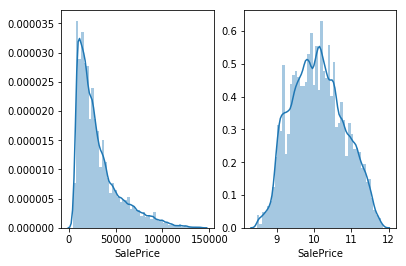

In [5]:
_, (ax1, ax2) = plt.subplots(ncols=2)

sns.distplot(df_raw.SalePrice, ax=ax1)
print('Origin SalePrice Skewness: {:f}'.format(df_raw.SalePrice.skew()))
print('Origin SalePrice Kurtosis: {:f}'.format(df_raw.SalePrice.kurt()))

log_saleprice = np.log(df_raw.SalePrice)
sns.distplot(log_saleprice, ax=ax2)
print('Log SalePrice Skewness: {:f}'.format(log_saleprice.skew()))
print('Log SalePrice Kurtosis: {:f}'.format(log_saleprice.kurt()))

## Root mean squared log error

It's important to note **what metric** is being used for a project. Generally, selecting the metric(s) is an important part of the project setup. However, in this case Kaggle tells us what metric to use: **RMSLE (root mean squared log error)** between the actual and predicted auction prices. Therefore we take the **log** of the prices, so that **RMSE** will give us what we need.

The reason we use log is because generally, you care not so much about missing by \$10 but missing by 10%. So if it was \$1000,000 item and you are \$100,000 off or if it was a \$10,000 item and you are \$1,000 off — we would consider those equivalent scale issues.

In [4]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

## scikit-learn

Most popular and important package for machine learning in Python. It is not the best at everything (e.g. **XGBoost** is better than **Gradient Boosting Tree**), but pretty good at nearly everything.

In [5]:
# The data set contains the mix of continuous and categorical variables.
mll.parse_date(df_raw, 'saledate', drop_origin=True)
display(df_raw.tail(100))

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saledate_is_month_end,saledate_is_month_start,saledate_is_quarter_end,saledate_is_quarter_start,saledate_is_year_end,saledate_is_year_start,saledate_hour,saledate_minute,saledate_second,saledate_elapsed
401025,6328127,9.648595,1815345,20103,149,1.0,2001,NaN,None,TL150,...,False,False,False,False,False,False,0,0,0,1317686400
401026,6328129,9.433484,1892077,20103,149,2.0,2001,NaN,None,TL150,...,False,False,False,False,False,False,0,0,0,1325203200
401027,6328130,9.680344,1892077,20103,149,1.0,2002,NaN,None,TL150,...,False,False,False,False,False,False,0,0,0,1314230400
401028,6328131,9.472705,1892077,20103,149,1.0,2002,NaN,None,TL150,...,False,False,False,False,False,False,0,0,0,1318896000
401029,6328136,9.047821,1843382,20103,149,1.0,2002,NaN,None,TL150,...,False,False,False,False,False,False,0,0,0,1317686400
401030,6328138,9.615805,1804006,20103,149,1.0,2002,NaN,None,TL150,...,False,False,False,False,False,False,0,0,0,1323129600
401031,6328139,8.922658,1897319,20103,149,5.0,2003,NaN,None,TL150,...,False,False,False,False,False,False,0,0,0,1316044800
401032,6328140,9.104980,1842820,20103,149,1.0,2003,NaN,None,TL150,...,False,False,False,False,False,False,0,0,0,1317686400
401033,6328141,9.615805,1842820,20103,149,99.0,2003,NaN,None,TL150,...,False,False,False,False,False,False,0,0,0,1312416000
401034,6328145,9.472705,1905057,20103,149,1.0,2004,NaN,None,TL150,...,False,False,False,False,False,False,0,0,0,1317686400


In [6]:
mll.str_to_category(df_raw)
display(df_raw.tail(100))

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saledate_is_month_end,saledate_is_month_start,saledate_is_quarter_end,saledate_is_quarter_start,saledate_is_year_end,saledate_is_year_start,saledate_hour,saledate_minute,saledate_second,saledate_elapsed
401025,6328127,9.648595,1815345,20103,149,1.0,2001,NaN,NaN,TL150,...,False,False,False,False,False,False,0,0,0,1317686400
401026,6328129,9.433484,1892077,20103,149,2.0,2001,NaN,NaN,TL150,...,False,False,False,False,False,False,0,0,0,1325203200
401027,6328130,9.680344,1892077,20103,149,1.0,2002,NaN,NaN,TL150,...,False,False,False,False,False,False,0,0,0,1314230400
401028,6328131,9.472705,1892077,20103,149,1.0,2002,NaN,NaN,TL150,...,False,False,False,False,False,False,0,0,0,1318896000
401029,6328136,9.047821,1843382,20103,149,1.0,2002,NaN,NaN,TL150,...,False,False,False,False,False,False,0,0,0,1317686400
401030,6328138,9.615805,1804006,20103,149,1.0,2002,NaN,NaN,TL150,...,False,False,False,False,False,False,0,0,0,1323129600
401031,6328139,8.922658,1897319,20103,149,5.0,2003,NaN,NaN,TL150,...,False,False,False,False,False,False,0,0,0,1316044800
401032,6328140,9.104980,1842820,20103,149,1.0,2003,NaN,NaN,TL150,...,False,False,False,False,False,False,0,0,0,1317686400
401033,6328141,9.615805,1842820,20103,149,99.0,2003,NaN,NaN,TL150,...,False,False,False,False,False,False,0,0,0,1312416000
401034,6328145,9.472705,1905057,20103,149,1.0,2004,NaN,NaN,TL150,...,False,False,False,False,False,False,0,0,0,1317686400


In [7]:
df_raw.UsageBand.cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace=True)
df_raw.UsageBand.cat.codes
# All missing values are replaced with -1

0         2
1         2
2         0
3         0
4         1
5         2
6         0
7         0
8         2
9         1
10        1
11        2
12       -1
13        1
14        2
15        1
16        2
17       -1
18        2
19        1
20        1
21        1
22        2
23        0
24        1
25        1
26        2
27       -1
28        2
29        1
         ..
401095   -1
401096   -1
401097   -1
401098   -1
401099   -1
401100   -1
401101   -1
401102   -1
401103   -1
401104   -1
401105   -1
401106   -1
401107   -1
401108   -1
401109   -1
401110   -1
401111   -1
401112   -1
401113   -1
401114   -1
401115   -1
401116   -1
401117   -1
401118   -1
401119   -1
401120   -1
401121   -1
401122   -1
401123   -1
401124   -1
Length: 401125, dtype: int8

In [10]:
# lots of missing values
display(df_raw.isnull().sum().sort_index() / len(df_raw))

Backhoe_Mounting             0.803872
Blade_Extension              0.937129
Blade_Type                   0.800977
Blade_Width                  0.937129
Coupler                      0.466620
Coupler_System               0.891660
Differential_Type            0.826959
Drive_System                 0.739829
Enclosure                    0.000810
Enclosure_Type               0.937129
Engine_Horsepower            0.937129
Forks                        0.521154
Grouser_Tracks               0.891899
Grouser_Type                 0.752813
Hydraulics                   0.200823
Hydraulics_Flow              0.891899
MachineHoursCurrentMeter     0.644089
MachineID                    0.000000
ModelID                      0.000000
Pad_Type                     0.802720
Pattern_Changer              0.752651
ProductGroup                 0.000000
ProductGroupDesc             0.000000
ProductSize                  0.525460
Pushblock                    0.937129
Ride_Control                 0.629527
Ripper      

In [10]:
# Fill the missing value with mean, and use codes to represent categories.
df, y = mll.process(df_raw, 'SalePrice')

In [11]:
# Check all columns are numberic
display(df)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,saledate_is_month_end_na,saledate_is_month_start_na,saledate_is_quarter_end_na,saledate_is_quarter_start_na,saledate_is_year_end_na,saledate_is_year_start_na,saledate_hour_na,saledate_minute_na,saledate_second_na,saledate_elapsed_na
0,1139246,999089,3157,121,3.0,2004,68.0,3,950,296,...,False,False,False,False,False,False,False,False,False,False
1,1139248,117657,77,121,3.0,1996,4640.0,3,1725,527,...,False,False,False,False,False,False,False,False,False,False
2,1139249,434808,7009,121,3.0,2001,2838.0,1,331,110,...,False,False,False,False,False,False,False,False,False,False
3,1139251,1026470,332,121,3.0,2001,3486.0,1,3674,1375,...,False,False,False,False,False,False,False,False,False,False
4,1139253,1057373,17311,121,3.0,2007,722.0,2,4208,1529,...,False,False,False,False,False,False,False,False,False,False
5,1139255,1001274,4605,121,3.0,2004,508.0,3,493,175,...,False,False,False,False,False,False,False,False,False,False
6,1139256,772701,1937,121,3.0,1993,11540.0,1,1453,419,...,False,False,False,False,False,False,False,False,False,False
7,1139261,902002,3539,121,3.0,2001,4883.0,1,740,243,...,False,False,False,False,False,False,False,False,False,False
8,1139272,1036251,36003,121,3.0,2008,302.0,3,779,250,...,False,False,False,False,False,False,False,False,False,False
9,1139275,1016474,3883,121,3.0,1000,20700.0,2,1771,540,...,False,False,False,False,False,False,False,False,False,False


In [28]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)

# `m.score` will return r² value (1 is good, 0 is bad)
m.score(df, y)

0.9826489549593685

## Possibly the most important idea in machine learning is that of having separate training & validation data sets.

![Underfitting and Overfitting](https://cdn-images-1.medium.com/max/1600/1*3O5pvKZ95nzJsSYamsfDLA.png)

The error for the pictured data points is lowest for the model on the far right (the blue curve passes through the red points almost perfectly), yet it’s not the best choice. Why is that? If you were to gather some new data points, they most likely would not be on that curve in the graph on the right, but would be closer to the curve in the middle graph.

This illustrates how using all our data can lead to **overfitting**. A validation set helps diagnose this problem.

## Taking a sample of the original data set is important

Most people run all of their models on all of the data all of the time using their best possible parameters which is just pointless. If you are trying to find out which feature is important and how they are related to each other, having that 4th decimal place of accuracy is not going to change any of your insights at all. Do most of your models on a large enough sample size that your accuracy is reasonable (within a reasonable distance of the best accuracy you can get) and taking a small number of seconds to train so that you can interactively do your analysis.

In [8]:
validate_size = 12000  # Kaggle test set size
train_size = len(df_raw) - validate_size

df_train, df_valid = mll.split(df_raw, train_size)

X_train, y_train = mll.process(df_train, 'SalePrice', sample_size=20000)
X_valid, y_valid = mll.process(df_valid, 'SalePrice')

print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape)

(20000, 90) (20000,) (12000, 90) (12000,)


In [50]:
# We have the basic model now.
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print(mll.scores(m, X_train, y_train, X_valid, y_valid))

CPU times: user 4.43 s, sys: 99.2 ms, total: 4.53 s
Wall time: 1.42 s
['train rmse: 0.119673', 'train r^2: 0.970389', 'validate rmse: 0.295467', 'validate r^2: 0.844093']


In [54]:
# Starting from the very begining, build a single tree.
m = RandomForestRegressor(n_estimators=1, max_depth=3,
                          bootstrap=False, n_jobs=-1)
%time m.fit(X_train, y_train)
print(mll.scores(m, X_train, y_train, X_valid, y_valid))

CPU times: user 165 ms, sys: 11.8 ms, total: 177 ms
Wall time: 195 ms
['train rmse: 0.540109', 'train r^2: 0.396851', 'validate rmse: 0.568746', 'validate r^2: 0.422324']


In [55]:
# Remove the depth to make tree better.
m = RandomForestRegressor(n_estimators=1, bootstrap=False, 
                          n_jobs=-1)
%time m.fit(X_train, y_train)
print(mll.scores(m, X_train, y_train, X_valid, y_valid))

CPU times: user 530 ms, sys: 8.23 ms, total: 538 ms
Wall time: 610 ms
['train rmse: 0.000000', 'train r^2: 1.000000', 'validate rmse: 0.405715', 'validate r^2: 0.706039']


## Bagging and Ensembling

Michael Jordan developed a technique called the ``Bag of Little Bootstraps`` in which he shows how to use bagging for absolutely any kind of model to make it more robust and also to give you confidence intervals.

**Random forest - a way of bagging trees.**

So what is bagging? Bagging is an interesting idea which is what if we created five different models each of which was only somewhat predictive but the models gave predictions that were **not correlated** with each other. That would mean that the five models would have profound different insights into the relationships in the data. If you took the average of those five models, you are effectively bringing in the insights from each of them. **So this idea of averaging models is a technique for Ensembling.**

What if we created a whole a lot of trees — big, deep, massively **overfit** trees but each one, let’s say, we only pick a random 1/10 of the data. Let’s say we do that a hundred times (different random sample every time). They are overfitting terribly but since they are all using different random samples, they all overfit in different ways on different things. In other words, they all have errors but the errors are random. The average of a bunch of random errors is zero. If we take the average of these trees each of which have been trained on a different random subset, the error will average out to zero and what is left is the true relationship — and **that’s the random forest.**

## The number of trees to use is the first of our hyper parameters we are going to tune to achieve higher metric.


In [60]:
# The number of trees to use is the first of our hyper parameters we are going
# to tune to achieve higher metric.

m = RandomForestRegressor(n_jobs=-1, n_estimators=40)
%time m.fit(X_train, y_train)
print(mll.scores(m, X_train, y_train, X_valid, y_valid))

CPU times: user 17.5 s, sys: 88.1 ms, total: 17.6 s
Wall time: 4.58 s
['train rmse: 0.101984', 'train r^2: 0.978496', 'validate rmse: 0.284069', 'validate r^2: 0.855889']


In [61]:
# To check that none of the individual prediction is close to the actual value,
# but the mean ends up pretty good.

preds = np.stack([t.predict(X_valid) for t in m.estimators_])
print('Predictions of first value by all trees: {}'.format(preds[:, 0]))
print('Mean of Predictions: {}'.format(np.mean(preds[:, 0])))
print('Actual value: {}'.format(y_valid[0]))

Predictions of first value by all trees: [9.19013766 9.12695876 9.39266193 9.39266193 8.98719682 9.74096862
 9.04782144 9.15904708 9.19013766 9.15904708 9.25913054 9.25913054
 9.74096862 9.15904708 9.21034037 9.12695876 9.47270464 9.19013766
 9.71111566 9.47270464 9.43348392 9.25913054 9.25913054 9.15904708
 9.15904708 9.15904708 9.18502256 9.21034037 9.47270464 9.04782144
 9.230143   9.15904708 9.25913054 8.98719682 9.47270464 9.25913054
 9.21034037 9.71111566 9.15904708 9.15904708]
Mean of Predictions: 9.273513888328864
Actual value: 9.104979856318357


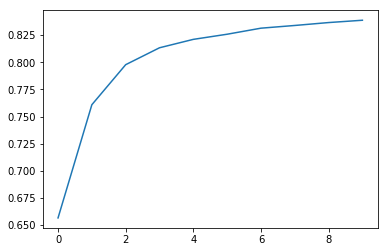

In [65]:
# The plot of R² values given first i trees.
# As we add more trees, R² improves.
# But it seems as though it has flattened out.
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0))
          for i in range(10)])

## Other hyper parameters

In [68]:
# The baseline to compare to.
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, 
                          oob_score=True)
%time m.fit(X_train, y_train)
print(mll.scores(m, X_train, y_train, X_valid, y_valid))

CPU times: user 17.3 s, sys: 95.4 ms, total: 17.4 s
Wall time: 4.65 s
['train rmse: 0.102024', 'train r^2: 0.978479', 'validate rmse: 0.284173', 'validate r^2: 0.855784']


### min_sample_leaf

Stop training the tree further when a leaf node has `min_sample_leaf` number of or less samples.

- Faster training time (only half the number of actual decision criteria we have to train.
- For each tree, rather than just taking one point, we are taking the average of at least `min_sample_leaf` points that we would expect the each tree to generalize better.

In [70]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, 
                          n_jobs=-1, oob_score=True) 
%time m.fit(X_train, y_train) 
print(mll.scores(m, X_train, y_train, X_valid, y_valid))

CPU times: user 14 s, sys: 85.8 ms, total: 14.1 s
Wall time: 3.86 s
['train rmse: 0.144178', 'train r^2: 0.957021', 'validate rmse: 0.283968', 'validate r^2: 0.855992']


### max_feature

The less correlated your trees are with each other, the better.

In addition to taking a subset of rows, at every single split point, take a different subset of columns.

In [71]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3,
                          max_features=0.5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train) 
print(mll.scores(m, X_train, y_train, X_valid, y_valid))

CPU times: user 7.68 s, sys: 99 ms, total: 7.78 s
Wall time: 2.2 s
['train rmse: 0.149408', 'train r^2: 0.953846', 'validate rmse: 0.279224', 'validate r^2: 0.860763']


In [12]:
# Try the hyper parameters on full data set.

X_train, y_train = mll.process(df_train, 'SalePrice')

print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape)

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3,
                          max_features=0.5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train) 
print(mll.scores(m, X_train, y_train, X_valid, y_valid))

(389125, 90) (389125,) (12000, 90) (12000,)
CPU times: user 3min 42s, sys: 2.77 s, total: 3min 45s
Wall time: 1min 2s
['train rmse: 0.119233', 'train r^2: 0.970289', 'validate rmse: 0.226718', 'validate r^2: 0.908205']


In [10]:
X_train, y_train = mll.process(df_train, 'SalePrice', sample_size=50000)

print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape)

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3,
                          max_features=0.5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train) 
print(mll.scores(m, X_train, y_train, X_valid, y_valid))

(50000, 90) (50000,) (12000, 90) (12000,)
CPU times: user 22.9 s, sys: 285 ms, total: 23.2 s
Wall time: 6.43 s
['train rmse: 0.137138', 'train r^2: 0.960559', 'validate rmse: 0.263488', 'validate r^2: 0.876015']


In [18]:
def get_preds(tree):
    return tree.predict(X_valid)

# Use multiple processes to predict using serveral trees in parallel.
%time preds = np.stack(mll.parallel(get_preds, m.estimators_))
print(preds.shape)
print(np.mean(preds[:, 0]), np.std(preds[:, 0]))


CPU times: user 96.5 ms, sys: 204 ms, total: 301 ms
Wall time: 1.21 s
(40, 12000)
9.398396084224597 0.35667670574482957


## Confidence interval

### `Enclosure` is a variable we don't know exactly what it means.

However, we can use the **standard deviation** of prediction for the error bars. This will tell us if there is some groups or some rows that we are **not very confident** of at all.

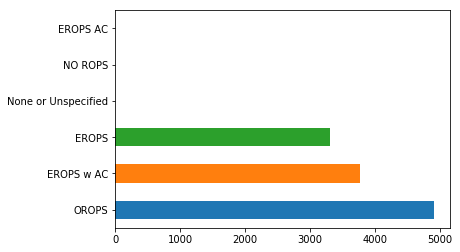

In [23]:
x = df_valid.copy()

x['pred_std'] = np.std(preds, axis=0)
x['pred'] = np.mean(preds, axis=0)

x.Enclosure.value_counts().plot.barh()

In [31]:
fields = ['Enclosure', 'SalePrice', 'pred', 'pred_std']

enclosures = x[fields].groupby('Enclosure', as_index=False).mean()
print(enclosures)

             Enclosure  SalePrice       pred  pred_std
0                EROPS   9.849178   9.849356  0.287711
1             EROPS AC        NaN        NaN       NaN
2           EROPS w AC  10.623971  10.562718  0.279065
3              NO ROPS        NaN        NaN       NaN
4  None or Unspecified        NaN        NaN       NaN
5                OROPS   9.682064   9.693248  0.224743


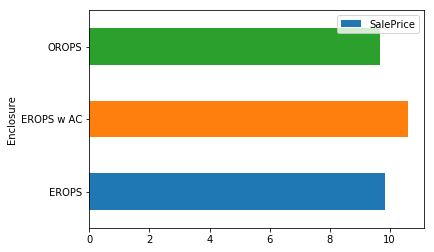

In [32]:
# Discard the rows whose SalePrice is empty.
enclosures = enclosures[~pd.isnull(enclosures.SalePrice)]
enclosures.plot.barh('Enclosure', 'SalePrice')

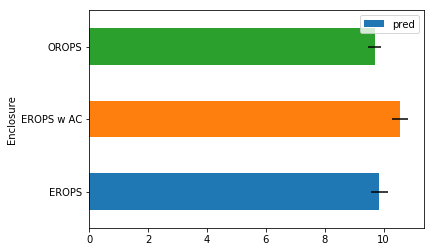

In [35]:
# Use xerr parameter to show the standard deviation.
enclosures.plot.barh('Enclosure', 'pred', xerr='pred_std')

### Take `ProductSize` as an example.

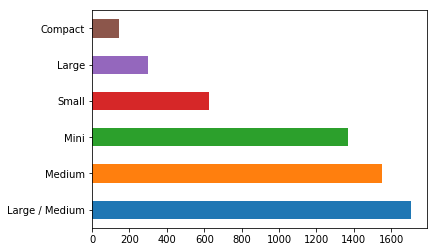

In [36]:
df_valid.ProductSize.value_counts().plot.barh()

In [42]:
fields = ['ProductSize', 'SalePrice', 'pred', 'pred_std']

product_sizes = x[fields].groupby('ProductSize', as_index=True).mean()
print(product_sizes)

                SalePrice       pred  pred_std
ProductSize                                   
Compact          9.735093   9.906407  0.348643
Large           10.470589  10.372056  0.363044
Large / Medium  10.691871  10.633351  0.310551
Medium          10.681511  10.621729  0.306781
Mini             9.535147   9.569623  0.268218
Small           10.324448  10.344466  0.324511


In [43]:
(product_sizes.pred_std / product_sizes.pred).sort_values(ascending=False)

ProductSize
Compact           0.035194
Large             0.035002
Small             0.031370
Large / Medium    0.029205
Medium            0.028882
Mini              0.028028
dtype: float64

What this tells us is that product size **Large** and **Compact**, our predictions are **less accurate** (relatively speaking as a ratio of the total price). 

### You can use this confidence interval for two main purposes:

1. You can look at the average confidence interval by group to find out if there are groups you do not seem to have confidence about.
2. Perhaps more importantly, you can look at them for specific rows.When you put it in production, you might always want to see the confidence interval. For example, if you are doing credit scoring to decide whether to give somebody a loan, you probably want to see not only what their level of risk is but how confident we are. If they want to borrow lots of money and we are not at all confident about our ability to predict whether they will pay back, we might want to give them a smaller loan.

## Feature importance

               columns  importance
5             YearMade    0.170373
13         ProductSize    0.092429
37      Coupler_System    0.086122
14  fiProductClassDesc    0.081016
39     Hydraulics_Flow    0.057120
38      Grouser_Tracks    0.055851
10     fiSecondaryDesc    0.051670
2              ModelID    0.049769
66    saledate_elapsed    0.048923
19           Enclosure    0.038917


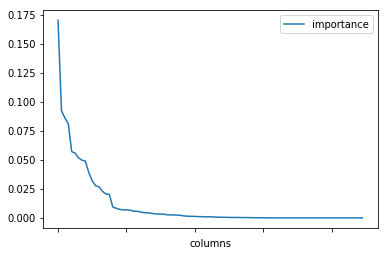

In [44]:
def feature_importances(m, df):
    return pd.DataFrame(
        {'columns': df.columns,
         'importance': m.feature_importances_}
    ).sort_values('importance', ascending=False)

X_train, _ = mll.process(df_train, 'SalePrice')
importances = feature_importances(m, X_train)
print(importances[:10])
importances.plot('columns', 'importance')

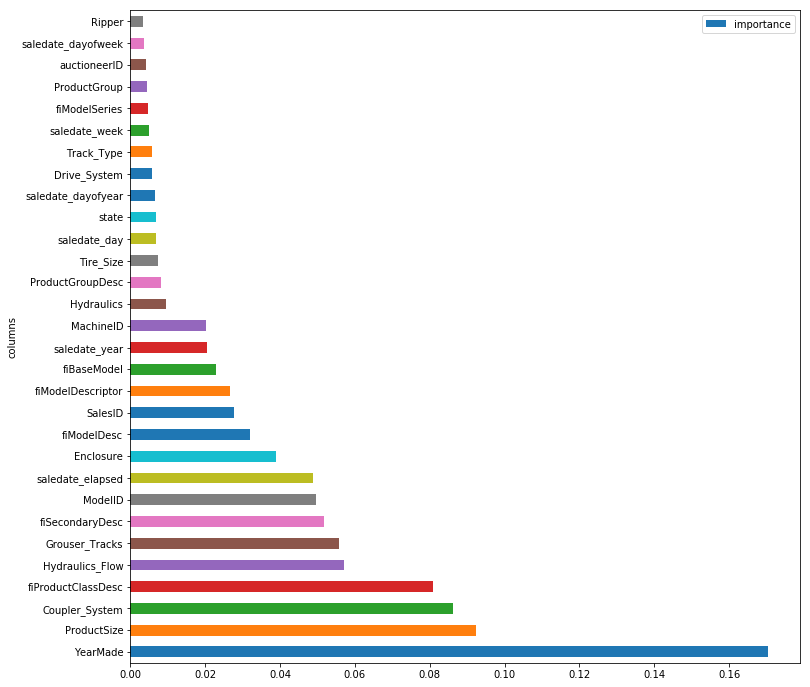

In [51]:
importances[:30].plot.barh('columns', 'importance', figsize=(12, 12))

After seeing the above **feature importance** plot, you could sit down with your client, your data dictionary, or whatever your source of information is and say to then “okay, tell me about YearMade. What does that mean? Where does it come from?” 

What will often happen in real-world projects is that you sit with the the client and you’ll say “it turns out the ``Coupler_System`` is the second most important thing” and they might say “that makes no sense.” That doesn’t mean that there is a problem with your model, it means there is a problem with their understanding of the data they gave you.

One is `Data Leakage`, the other is `Collinearity`.

## Data Leakage

Data leakage means there is information in the dataset that I was modeling with which the university would not have had in real life at that point in time they were making a decision. 

## Collinearity

It is sometimes good to **throw some data away** and see if it make any difference. In this case, we have a random forest which was .889 r². Here we filter out those where the importance is equal to or less than 0.005 

In [71]:
kept_columns = importances[importances.importance > 0.005]['columns']
print(kept_columns)
print(len(kept_columns))

X_train, y_train = mll.process(df_train, 'SalePrice')
X_train = X_train[kept_columns]

tmp_valid = X_valid[kept_columns].copy()

print(X_train.shape, y_train.shape, tmp_valid.shape, y_valid.shape)

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3,
                          max_features=0.5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train) 
print(mll.scores(m, X_train, y_train, tmp_valid, y_valid))

5               YearMade
13           ProductSize
37        Coupler_System
14    fiProductClassDesc
39       Hydraulics_Flow
38        Grouser_Tracks
10       fiSecondaryDesc
2                ModelID
66      saledate_elapsed
19             Enclosure
8            fiModelDesc
0                SalesID
12     fiModelDescriptor
9            fiBaseModel
51         saledate_year
1              MachineID
30            Hydraulics
17      ProductGroupDesc
35             Tire_Size
54          saledate_day
15                 state
56    saledate_dayofyear
18          Drive_System
40            Track_Type
53         saledate_week
Name: columns, dtype: object
25
(389125, 25) (389125,) (12000, 25) (12000,)
CPU times: user 2min 17s, sys: 4.6 s, total: 2min 22s
Wall time: 38.4 s
['train rmse: 0.123787', 'train r^2: 0.967975', 'validate rmse: 0.226201', 'validate r^2: 0.908623']


## It seems not so improved after removing some columns